In [5]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import json
from pathlib import Path
from dispatches.case_studies.renewables_h2_case.re_h2_parameters import *
plt.style.use('seaborn')

SMALL_SIZE = 12
MEDIUM_SIZE = 14
BIGGER_SIZE = 16

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=MEDIUM_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

In [6]:
surrogates_dir = re_h2_dir / "128_results_317_CT_15_500_surrogate"

In [138]:
run = "0000070"
results_df = pd.read_parquet(surrogates_dir / f"results4_{run}.parquet")
df = pd.read_csv(re_h2_dir / "data" / "Wind_Thermal_Gen.csv", index_col="Datetime", parse_dates=True)
df = df.query(f"Reserves == {reserves} & Shortfall == {shortfall}")
df = df[df['Mod Gen'] == gas_gen]
results_df.insert(loc=0, column='Wind Load [MW]', value=wind_loads_mw[:len(results_df)])
results_df.insert(loc=0, column='Underpower [MW]', value=results_df['Wind Load [MW]'] - results_df['Total Power Output [MW]'])
results_df['Underpower [MW]'] = results_df['Underpower [MW]'].clip(lower=0)

with open(surrogates_dir / f"results4_{run}.json", 'r') as f:
    results_json = json.load(f)
    results_json.pop("wind_load")
    results_json.pop("batt_hr")

results_df['Wind Max [MWh]'] = df['317_WIND_1-RTCF'].values * results_json['wind_mw']
results_df['Curtailment Orig [MWh]'] = df['317_WIND_1-RTCF'].values * wind_gen_pmax - results_df['Wind Load [MW]'].values
results_df['Curtailment [MWh]'] = results_df['Wind Max [MWh]'] - results_df['Wind Load [MW]'] - results_df['Wind Power to Battery [MW]'] - results_df['Wind Power to PEM [MW]']

# results_json

In [139]:
results_df['Total Wind Generation [MW]'] - results_df['Wind Load [MW]'] - results_df['Wind Power to Battery [MW]'] - results_df['Wind Power to PEM [MW]']
results_df['Curtailment [MWh]'].sum(), results_df['Curtailment Orig [MWh]'].sum()

(158125.33900617727, 157418.9209079998)

In [140]:
results_df.columns

Index(['Underpower [MW]', 'Wind Load [MW]', 'Total Wind Generation [MW]',
       'Total Power Output [MW]', 'Wind Power Output [MW]',
       'Wind Power to Battery [MW]', 'State of Charge [MWh]',
       'Battery Power Output [MW]', 'Wind Power to PEM [MW]',
       'PEM H2 Output [kg]', 'Tank H2 Input [kg]', 'H2 Sales [kg]',
       'Turbine H2 Input [kg]"', 'Tank Holdup [kg]',
       'Turbine Power Output [MW]', 'Peaker Power Output [MW]',
       'Peaker Sold Power Month [MWh]', 'Peaker Energy Price [$/MWh]',
       'Peaker Revenue [$]', 'Peaker Dispatch CF Month [1]', 'Wind Max [MWh]',
       'Curtailment Orig [MWh]', 'Curtailment [MWh]'],
      dtype='object')

In [141]:
results_df.iloc[results_df['Peaker Power Output [MW]'].argmax()]
results_df[results_df['Peaker Power Output [MW]'] > 0]
results_df[results_df['Wind Power to Battery [MW]'] > 10]
results_df.iloc[results_df['H2 Sales [kg]'].argmax()]
results_df.describe()


,Underpower [MW],Wind Load [MW],Total Wind Generation [MW],Total Power Output [MW],Wind Power Output [MW],Wind Power to Battery [MW],State of Charge [MWh],Battery Power Output [MW],Wind Power to PEM [MW],PEM H2 Output [kg],...,Tank Holdup [kg],Turbine Power Output [MW],Peaker Power Output [MW],Peaker Sold Power Month [MWh],Peaker Energy Price [$/MWh],Peaker Revenue [$],Peaker Dispatch CF Month [1],Wind Max [MWh],Curtailment Orig [MWh],Curtailment [MWh]
count,8784.0,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,...,8784.000000,8784.000000,8784.000000,8784.000000,8784.0000,8784.000000,8784.000000,8784.000000,8.784000e+03,8784.000000
mean,0.0,244.150874,249.499765,249.363065,249.335278,0.026158,2.522728,0.023608,0.138329,2.517208,...,82.275767,0.004179,0.027787,20.331716,39.2658,798.341101,0.022606,262.316879,1.792110e+01,18.001519
std,0.0,276.941794,277.307225,277.166252,277.171359,0.071914,0.677570,0.027775,0.135430,2.464458,...,22.609929,0.003261,0.030312,19.079077,0.0000,749.155224,0.021213,288.211400,8.905477e+01,89.088869
min,0.0,0.000000,2.101574,1.722908,1.722908,0.000392,0.015632,0.000000,0.000987,0.017969,...,6.139611,0.000000,0.000000,0.889233,39.2658,34.916448,0.000989,2.101962,-1.136868e-13,0.000583
25%,0.0,8.300000,9.807419,9.826260,9.800900,0.001798,2.141802,0.002199,0.005389,0.098072,...,69.547626,0.001751,0.004116,3.419834,39.2658,134.282521,0.003802,9.909252,-5.329071e-14,0.002914
50%,0.0,92.800000,108.087627,108.046750,108.008347,0.003892,2.562122,0.011411,0.071858,1.307631,...,84.125276,0.003856,0.015279,13.555644,39.2658,532.273210,0.015072,109.702422,-1.421085e-14,0.022071
75%,0.0,484.825000,493.053172,492.754839,492.713458,0.013171,2.998445,0.034681,0.305673,5.562430,...,95.668213,0.006128,0.042714,36.545975,39.2658,1435.006976,0.040634,532.046736,0.000000e+00,0.203511
max,0.0,794.100000,794.626592,794.321748,794.308706,0.546682,4.364924,0.098928,0.316223,5.754407,...,140.711554,0.023511,0.100971,53.785083,39.2658,2111.914344,0.059801,795.843025,7.891000e+02,789.515246


In [142]:
(results_df['Wind Load [MW]'] + results_df['Curtailment Orig [MWh]'] - results_df['Wind Max [MWh]']).abs().max()
results_df['Wind Power to Battery [MW]'].sum() / results_df['Curtailment [MWh]'].sum()

0.0014531104668537797

Text(0.5, 1.0, 'Hybrid')

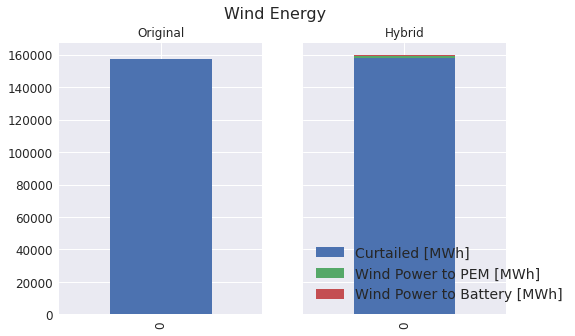

In [143]:
fig, axs = plt.subplots(1, 2, figsize=(8, 5), sharey=True)
results_df['Wind Load [MWh]'] = results_df['Wind Load [MW]']
results_df['Curtailed [MWh]'] = results_df['Curtailment Orig [MWh]']
results_df['Curtailment Orig [MWh]'].sum() / results_df['Wind Max [MWh]'].sum()
results_df.sum().to_frame().T[[
    # 'Wind Load [MWh]', 
    'Curtailed [MWh]', 
]].plot(kind='bar', stacked=True, ax=axs[0], legend=False)
plt.suptitle("Wind Energy")
axs[0].set_title("Original")
results_df['Curtailed [MWh]'] = results_df['Curtailment [MWh]']
results_df['Wind Power to Battery [MWh]'] = results_df['Wind Power to Battery [MW]']
results_df['Wind Power to PEM [MWh]'] = results_df['Wind Power to PEM [MW]']

results_df.sum().to_frame().T[[
    # 'Wind Load [MWh]', 
    'Curtailed [MWh]', 'Wind Power to PEM [MWh]',
    'Wind Power to Battery [MWh]'
]].plot(kind='bar', stacked=True, ax=axs[1])
axs[1].set_title("Hybrid")

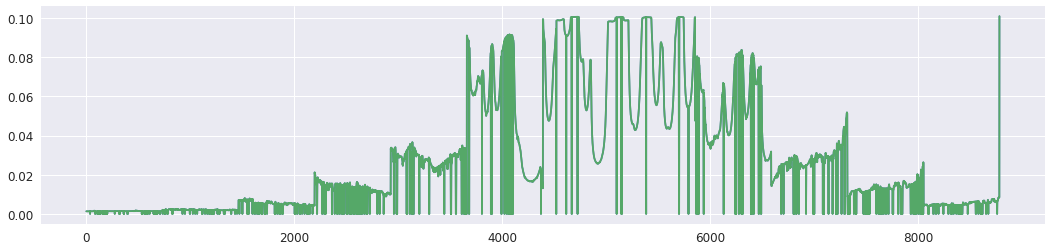

In [144]:
fig, ax = plt.subplots(1, 1, figsize=(18, 4))
ax.plot(results_df['Peaker Power Output [MW]'])
ax.plot(results_df['Peaker Power Output [MW]'])

In [145]:
results_df = results_df.set_index(df.index[:len(results_df)])
resampling_d = {k: np.sum for k in ['Underpower [MW]', 'Wind Load [MW]', 'Total Wind Generation [MW]',
       'Total Power Output [MW]', 'Wind Power Output [MW]',
       'Wind Power to Battery [MW]', 'State of Charge [MWh]',
       'Battery Power Output [MW]', 'Wind Power to PEM [MW]',
       'PEM H2 Output [kg]', 'Tank H2 Input [kg]', 'H2 Sales [kg]',
       'Turbine H2 Input [kg]"', 'Tank Holdup [kg]',
       'Turbine Power Output [MW]', 'Peaker Power Output [MW]', 
       'Curtailment [MWh]', 'Curtailment Orig [MWh]']}
resampling_d.update(  
       {k: np.mean for k in ['Peaker Energy Price [$/MWh]',
       'Peaker Revenue [$]',
       'Peaker Sold Power Month [MWh]',
       'Peaker Dispatch CF Month [1]']})
results_df_month = results_df.resample("1M").agg(resampling_d)
display(results_df_month)
results_df_month.sum(axis=0, numeric_only=True)

,Underpower [MW],Wind Load [MW],Total Wind Generation [MW],Total Power Output [MW],Wind Power Output [MW],Wind Power to Battery [MW],State of Charge [MWh],Battery Power Output [MW],Wind Power to PEM [MW],PEM H2 Output [kg],...,"Turbine H2 Input [kg]""",Tank Holdup [kg],Turbine Power Output [MW],Peaker Power Output [MW],Curtailment [MWh],Curtailment Orig [MWh],Peaker Energy Price [$/MWh],Peaker Revenue [$],Peaker Sold Power Month [MWh],Peaker Dispatch CF Month [1]
Datetime,,,,,,,,,,,,,,,,,,,,,
2020-01-31,0.0,387765.482755,393729.033465,393535.308716,393534.399178,1.725536,1663.478083,0.429031,192.908750,3510.422867,...,32.033816,62828.185171,0.480507,0.909538,21101.696578,20914.417245,39.2658,35.219025,0.896939,0.000997
2020-02-29,0.0,166409.097941,170628.663569,170531.594423,170530.287861,1.285109,2044.498895,0.705263,97.090599,1766.789006,...,40.086655,57764.329762,0.601300,1.306563,14428.454109,14357.902059,39.2658,53.676246,1.366997,0.001520
2020-03-31,0.0,221807.620536,226585.124488,226451.152040,226447.747274,2.656972,2320.127740,2.201013,134.720242,2451.547785,...,80.250220,62137.162600,1.203753,3.404766,14361.325637,14278.079464,39.2658,131.682318,3.353613,0.003729
2020-04-30,0.0,124516.917683,128567.339115,128469.014059,128460.902546,6.010458,2041.019468,5.760423,100.426111,1827.486396,...,156.739300,60782.674389,2.351090,8.111513,11675.999326,11655.182317,39.2658,322.956069,8.224869,0.009145
2020-05-31,0.0,122320.295117,127233.258699,127150.812387,127131.839865,16.544869,1938.754847,15.038565,84.873964,1544.478962,...,262.263739,59998.448106,3.933956,18.972522,17833.633074,17804.104883,39.2658,725.094476,18.466311,0.020532
2020-06-30,0.0,128218.000114,129893.656148,129825.379691,129789.184264,33.343110,1881.153917,31.768765,71.128774,1294.353292,...,295.110757,65417.263507,4.426661,36.195427,4819.934149,4800.099886,39.2658,1423.396734,36.250292,0.040305
2020-07-31,0.0,90445.946486,90836.778826,90804.615941,90751.603324,53.194562,1702.658799,47.883285,31.980940,581.967493,...,341.955422,53188.359577,5.129331,53.012617,640.799129,640.853514,39.2658,2090.078623,53.228983,0.059183
2020-08-31,0.0,109266.569467,110352.597721,110308.906103,110253.915553,51.812228,1734.124970,47.963958,46.869941,852.907460,...,468.439514,57634.011968,7.026593,54.990550,3845.445610,3838.430533,39.2658,2111.914344,53.785083,0.059801
2020-09-30,0.0,136834.959556,139697.699690,139613.663897,139577.483837,37.206762,1836.040948,31.780694,83.009091,1510.543249,...,293.291043,62353.463350,4.399366,36.180059,8606.125429,8590.440444,39.2658,1435.006976,36.545975,0.040634


Underpower [MW]                  0.000000e+00
Wind Load [MW]                   2.144621e+06
Total Wind Generation [MW]       2.191606e+06
Total Power Output [MW]          2.190405e+06
Wind Power Output [MW]           2.190161e+06
Wind Power to Battery [MW]       2.297736e+02
State of Charge [MWh]            2.215964e+04
Battery Power Output [MW]        2.073707e+02
Wind Power to PEM [MW]           1.215078e+03
PEM H2 Output [kg]               2.211116e+04
Tank H2 Input [kg]               2.211116e+04
H2 Sales [kg]                    1.966377e+04
Turbine H2 Input [kg]"           2.447393e+03
Tank Holdup [kg]                 7.227103e+05
Turbine Power Output [MW]        3.671090e+01
Peaker Power Output [MW]         2.440816e+02
Curtailment [MWh]                1.581253e+05
Curtailment Orig [MWh]           1.574189e+05
Peaker Energy Price [$/MWh]      4.711896e+02
Peaker Revenue [$]               9.542184e+03
Peaker Sold Power Month [MWh]    2.430151e+02
Peaker Dispatch CF Month [1]     2

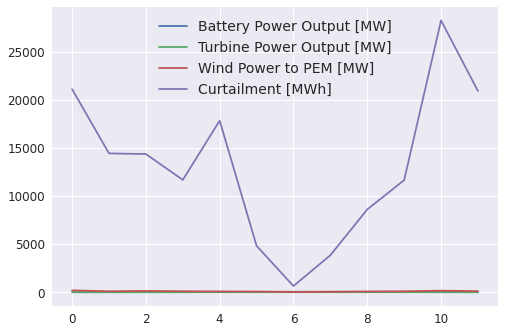

In [146]:
results_df_month.reset_index()[['Battery Power Output [MW]', 'Turbine Power Output [MW]', 'Wind Power to PEM [MW]', 'Curtailment [MWh]']].plot()

In [164]:
# results_df_month['Wind Curtailment [MW'] = 
results_df_month['Turbine Output [MWh]'] = results_df_month['Turbine Power Output [MW]'] 
results_df_month['Battery Output [MWh]'] = results_df_month['Battery Power Output [MW]'] 
results_df_month['Wind to PEM [MWh]'] = results_df_month['Wind Power to PEM [MW]'] 


Text(0, 0.5, 'MWh')

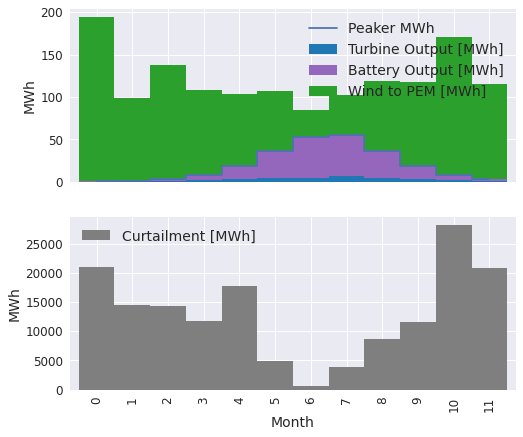

In [165]:
import seaborn as sns
palette = sns.color_palette("tab10")
fig, ax = plt.subplots(2, 1, figsize=(8, 7), sharex=True)
ax[0].plot(range(12), results_df_month['Peaker Power Output [MW]'], label="Peaker MWh", drawstyle="steps-mid")
results_df_month.reset_index()[['Turbine Output [MWh]', 'Battery Output [MWh]', 
    'Wind to PEM [MWh]', 
]].plot(kind='bar', width=1, stacked=True, ax=ax[0],
    color=[list(palette[0]) + [1], list(palette[4]) + [1], list(palette[2]) + [1], list(palette[6]) + [0.5], list(palette[8]) + [0.5]])
# ax[0].bar(range(12), results_df_month['Battery Power Output [MW]'], label="Battery MWh")
# ax[0].bar(range(12), results_df_month['Turbine Power Output [MW]'], bottom = results_df_month['Battery Power Output [MW]'], label="Turbine MWh")
ax[0].legend()
ax[0].set_xlabel("Month")
ax[0].set_ylabel("MWh")
(results_df_month.reset_index()[['Curtailment [MWh]']]).plot(kind='bar', width=1, stacked=True, ax=ax[1],
    color=[list(palette[7]) + [1]])
# ax[1].plot(range(12), results_df_month['H2 Sales [kg]'] * kg_to_tons, drawstyle="steps-mid")
ax[1].set_xlabel("Month")
ax[1].set_ylabel("MWh")

In [169]:
results_json

{'wind_mw': 799.84676335384,
 'wind_mw_ub': 10000,
 'batt_mw': 0.7079613335469596,
 'pem_mw': 0.3205069632645279,
 'pem_bar': 1.01325,
 'pem_temp': 300,
 'tank_size': 1333.3333333333333,
 'turb_mw': 0.06758502809522654,
 'turb_conv': 15.0,
 'tank_holdup_init': 0,
 'h2_price_per_kg': 2.0,
 'build_add_wind': True,
 'design_opt': True,
 'opt_mode': 'surrogate',
 'shortfall_price': 500,
 'wind_cap_cost': 1550,
 'wind_op_cost': 43,
 'batt_cap_cost_kw': 500.0,
 'batt_cap_cost_kwh': 133.33333333333334,
 'batt_rep_cost_kwh': 122.2875,
 'pem_cap_cost': 1466.6666666666667,
 'pem_op_cost': 47.9,
 'pem_var_cost': 0.0013,
 'tank_cap_cost_per_kg': 541.6666666666666,
 'tank_op_cost': 85.0,
 'turbine_cap_cost': 1083.3333333333333,
 'turbine_op_cost': 11.65,
 'turbine_var_cost': 0.0042699999999999995,
 'wind_gen': '317_WIND',
 'wind_gen_pmax': 799.1,
 'start_date': '2020-01-01 00:00:00',
 'gas_gen': '317_CT',
 'reserves': 15,
 'shortfall': 500,
 'tempfile': '/lustre/eaglefs/projects/gmihybridsys/dguitt

In [171]:
results_df['Peaker Power Output [MW]'].sum() * results_json['avg_revenue_per_mwh'] * 1e-6

0.009584057930951247

In [149]:
double_loop_name = "double_loop_parametrized_rdc4gen_results_103/"
tracker_df = pd.read_csv(surrogates_dir / double_loop_name / f"tracker_detail.csv")
model_df = pd.read_csv(surrogates_dir / double_loop_name / f"tracking_model_detail.csv")


In [150]:
((results_df_month['Wind Load [MW]'].sum() + results_df_month['Peaker Sold Power Month [MWh]'].sum()) / 
    tracker_df['Power Dispatch [MW]'].sum())

0.36484537016728896

In [151]:
tracker_df

,Date,Hour,Horizon [hr],Power Dispatch [MW],Power Output [MW],Power Underdelivered [MW],Power Overdelivered [MW]
0,2020-01-01,0,0,0.00,0.00,0.0,0.0
1,2020-01-01,0,1,806.12,806.12,0.0,0.0
2,2020-01-01,0,2,381.58,381.58,0.0,0.0
3,2020-01-01,0,3,262.60,262.60,0.0,0.0
4,2020-01-01,1,0,0.00,0.00,0.0,0.0
...,...,...,...,...,...,...,...
34939,2020-12-29,22,3,460.03,145.85,0.0,0.0
34940,2020-12-29,23,0,0.00,0.00,0.0,0.0
34941,2020-12-29,23,1,460.03,279.85,0.0,0.0
34942,2020-12-29,23,2,460.03,145.85,0.0,0.0


In [152]:
bus_df = pd.read_csv(surrogates_dir / double_loop_name / "bus_detail.csv")
bus_df = bus_df[bus_df['Bus'] == "Chuhsi"]
lmp_rt = bus_df['LMP'].values
lmp_da = bus_df['LMP DA'].values

In [153]:
summary_df = pd.read_csv(surrogates_dir / double_loop_name / "thermal_detail.csv")
summary_df[summary_df["Generator"] == '317_WIND_1']
disp_da = summary_df['Dispatch DA'].values
disp_rt = summary_df['Dispatch'].values

In [154]:
display(tracker_df.describe())
display(tracker_df.sum(axis=0, numeric_only=True))
display(model_df.describe())
display(model_df.sum(axis=0, numeric_only=True))


,Hour,Horizon [hr],Power Dispatch [MW],Power Output [MW],Power Underdelivered [MW],Power Overdelivered [MW]
count,34944.000000,34944.00000,34944.000000,34944.000000,34944.000000,34944.0
mean,11.500000,1.50000,168.235779,133.249048,34.944560,0.0
std,6.922286,1.11805,244.828696,220.125743,98.271935,0.0
min,0.000000,0.00000,0.000000,0.000000,0.000000,0.0
25%,5.750000,0.75000,0.000000,0.000000,0.000000,0.0
50%,11.500000,1.50000,33.740000,20.230000,0.000000,0.0
75%,17.250000,2.25000,260.765000,148.820000,2.440000,0.0
max,23.000000,3.00000,867.000000,867.000000,750.310000,0.0


Hour                          401856.00
Horizon [hr]                   52416.00
Power Dispatch [MW]          5878831.06
Power Output [MW]            4656254.73
Power Underdelivered [MW]    1221102.72
Power Overdelivered [MW]           0.00
dtype: float64

,Hour,Horizon [hr],Total Wind Generation [MW],Total Power Output [MW],Wind Power Output [MW],Wind Curtailment [MW],Battery Power Output [MW],Wind Power to Battery [MW],State of Charge [MWh],Wind Power to PEM [MW],PEM H2 Output [kg],Tank H2 Input [kg],H2 Sales [kg],Turbine H2 Input [kg],Tank Holdup [kg],Turbine Power Output [MW],Total Cost [$]
count,34944.000000,34944.00000,34944.000000,34944.000000,34944.000000,34944.000000,34944.000000,34944.000000,34944.000000,34944.000000,34944.000000,34944.000000,34944.0,34944.000000,34944.000000,34944.000000,34944.000000
mean,11.500000,1.50000,133.947814,133.249042,125.763827,284.272988,3.187236,1.779817,100.739019,6.404181,116.538693,116.538693,0.0,214.899338,4968.739529,4.297976,15052.538560
std,6.922286,1.11805,222.473990,220.125801,217.058627,312.518027,2.836753,2.689360,5.948971,11.185254,203.541334,203.541334,0.0,193.883401,341.197148,3.877676,24415.897505
min,0.000000,0.00000,0.000000,0.000000,0.000000,2.278000,0.000000,-0.000000,11.700000,0.000000,0.000000,0.000000,0.0,0.000000,961.158000,0.000000,0.000000
25%,5.750000,0.75000,0.000000,0.000000,0.000000,10.714000,0.000000,0.000000,98.084000,0.000000,0.000000,0.000000,0.0,0.000000,4804.747000,0.000000,34.374000
50%,11.500000,1.50000,11.935000,20.234000,6.944000,118.153000,5.415000,0.000000,104.400000,0.000000,0.000000,0.000000,0.0,346.440000,5207.247000,6.929000,835.427000
75%,17.250000,2.25000,151.245000,148.815000,136.803000,577.638000,6.000000,6.000000,104.400000,5.099000,92.795000,92.795000,0.0,402.500000,5207.247000,8.050000,20362.602000
max,23.000000,3.00000,859.514000,867.000000,858.537000,862.660000,6.000000,6.000000,104.400000,30.700000,558.658000,558.658000,0.0,402.500000,5207.247000,8.050000,86266.012000


Hour                          4.018560e+05
Horizon [hr]                  5.241600e+04
Total Wind Generation [MW]    4.680672e+06
Total Power Output [MW]       4.656255e+06
Wind Power Output [MW]        4.394691e+06
Wind Curtailment [MW]         9.933635e+06
Battery Power Output [MW]     1.113748e+05
Wind Power to Battery [MW]    6.219392e+04
State of Charge [MWh]         3.520224e+06
Wind Power to PEM [MW]        2.237877e+05
PEM H2 Output [kg]            4.072328e+06
Tank H2 Input [kg]            4.072328e+06
H2 Sales [kg]                 0.000000e+00
Turbine H2 Input [kg]         7.509442e+06
Tank Holdup [kg]              1.736276e+08
Turbine Power Output [MW]     1.501885e+05
Total Cost [$]                5.259959e+08
dtype: float64